In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [56]:
data = pd.read_csv("mushrooms.csv")

In [57]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [67]:

encoder = LabelEncoder()

for column in range(len(data.columns)):
    data[data.columns[column]]=encoder.fit_transform(data[data.columns[column]])
    mappings_dict={index: label for index,label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)
   

In [68]:
 mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

# Visualization

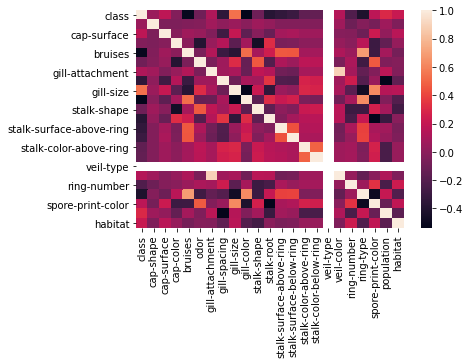

In [72]:
corr = data.corr()
sns.heatmap(corr)

In [71]:
y = data['class']
X = data.drop('class', axis=1)
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

# Models

In [60]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [62]:
log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')

In [64]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

SVC()

In [66]:
print(f"Logistic Regression: {log_model.score(X_test, y_test)}")
print(f"Support Vector Classifier: {svm_model.score(X_test, y_test)}")


Logistic Regression: 0.9513846153846154
Support Vector Machine: 1.0


Support vector classifier is best model